In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/turkiye-student-evaluation_generic.csv")


In [ ]:
df.describe()


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


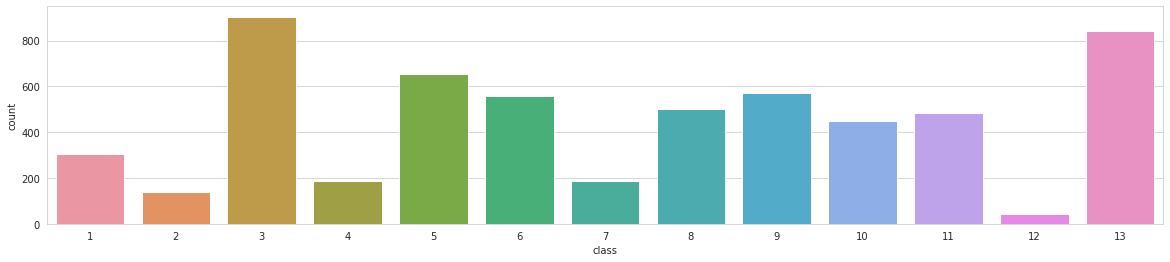

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(x='class',data=df)

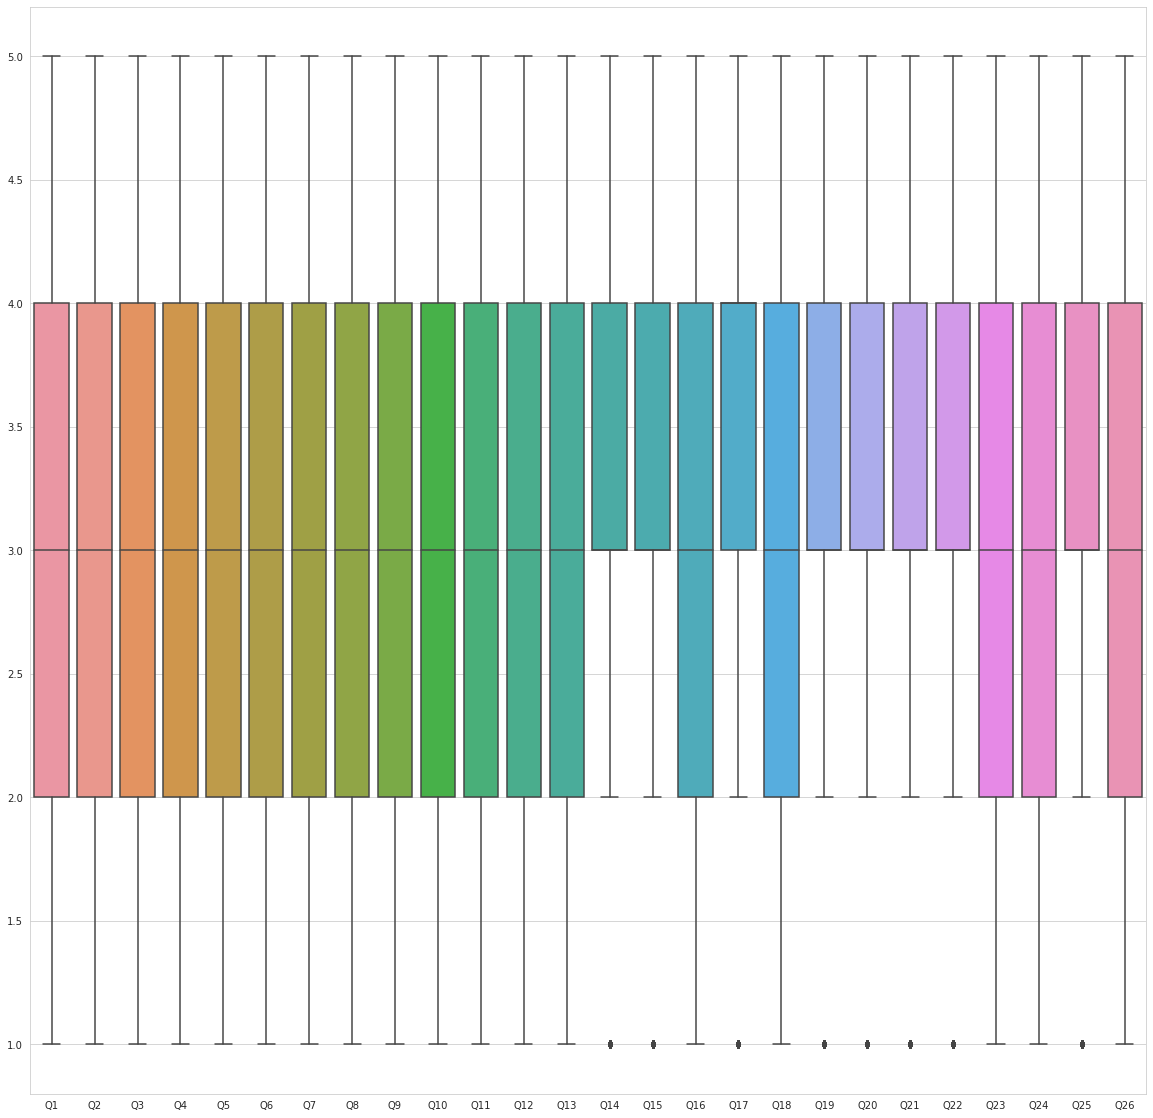

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df.iloc[:,5:31])

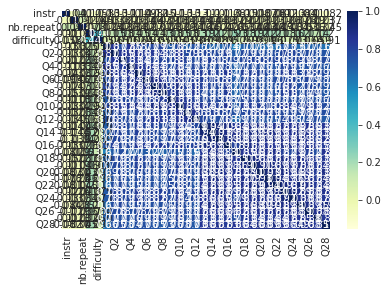

In [ ]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()


In [ ]:
def correlation(df, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname] # deleting the column from the dataset

    return df

In [ ]:
df_selected=correlation(df,0.8)

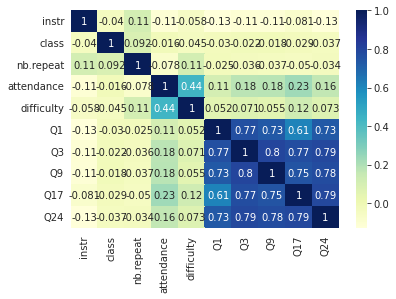

In [ ]:
sns.heatmap(df_selected.corr(),cmap="YlGnBu",annot=True)


In [ ]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q3,Q9,Q17,Q24
0,1,2,1,0,4,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1


In [ ]:
X = df.iloc[:, [0,1,2,4,5,6,7,8,9]].values
y = df.iloc[:, 3].values

In [ ]:
X

array([[ 1,  2,  1, ...,  3,  3,  3],
       [ 1,  2,  1, ...,  3,  3,  3],
       [ 1,  2,  1, ...,  5,  5,  5],
       ...,
       [ 3, 13,  1, ...,  5,  5,  5],
       [ 3, 13,  1, ...,  1,  1,  1],
       [ 3, 13,  1, ...,  1,  1,  1]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

**KNN CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_test

array([0, 3, 3, ..., 2, 0, 1])

In [ ]:
y_pred

array([0, 3, 3, ..., 0, 2, 3])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
cm

array([[287,  32,  19,  32,  12],
       [ 53,  62,  25,  43,  18],
       [ 26,  37,  34,  42,  10],
       [ 53,  58,  41,  78,  21],
       [ 46,  35,  28,  49,  23]])

In [ ]:
ac


0.41580756013745707

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))

In [ ]:
Precision

array([0.6172043 , 0.27678571, 0.23129252, 0.31967213, 0.27380952])

In [ ]:
Recall

array([0.7513089 , 0.30845771, 0.22818792, 0.31075697, 0.12707182])

In [ ]:
Fscore

array([0.67768595, 0.29176471, 0.22972973, 0.31515152, 0.17358491])

In [ ]:
specificity

array([0.77237852, 0.8317757 , 0.88866995, 0.81818182, 0.93794507])

In [ ]:
FPR

array([0.22762148, 0.1682243 , 0.11133005, 0.18181818, 0.06205493])

In [ ]:
error_rate = 1-ac
error_rate

0.5841924398625429

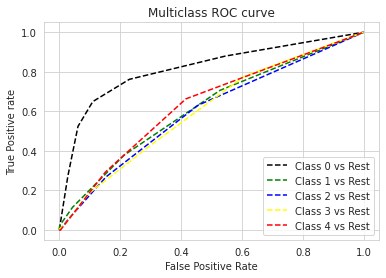

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = classifier.predict(X_test)
pred_prob = classifier.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);


**RANDOM FOREST FOR CLASSIFICATION**

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.988831615120275
Mean Squared Error: 2.2757731958762886
Root Mean Squared Error: 1.5085666030627514


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
cm

array([[289,  24,   0,  69,   0],
       [ 40,  32,   0, 129,   0],
       [ 26,   2,   0, 121,   0],
       [ 41,   6,   0, 204,   0],
       [ 41,   4,   0, 136,   0]])

In [ ]:
ac

0.45103092783505155

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


In [ ]:
Precision

array([0.66132723, 0.47058824,        nan, 0.30955994,        nan])

In [ ]:
Recall

array([0.7565445 , 0.15920398, 0.        , 0.812749  , 0.        ])

In [ ]:
Fscore

array([0.70573871, 0.23791822,        nan, 0.44835165,        nan])

In [ ]:
specificity

array([0.81074169, 0.96261682, 1.        , 0.50164294, 1.        ])

In [ ]:
FPR

array([0.18925831, 0.03738318, 0.        , 0.49835706, 0.        ])

In [ ]:
error_rate = 1-ac
error_rate

0.5489690721649485

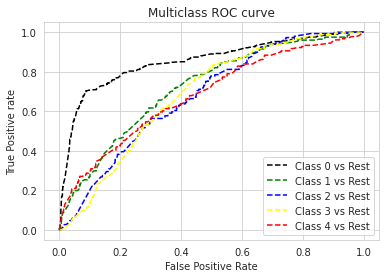

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);


**NAIVE BAYES CLASSIFIER**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)


In [ ]:
ac

0.422680412371134

In [ ]:
cm

array([[278,  34,   8,  54,   8],
       [ 50,  49,   7,  88,   7],
       [ 31,  20,   2,  95,   1],
       [ 54,  31,   3, 161,   2],
       [ 48,  18,   5, 108,   2]])

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))

In [ ]:
Precision

array([0.60303688, 0.32236842, 0.08      , 0.31818182, 0.1       ])

In [ ]:
Recall

array([0.72774869, 0.24378109, 0.01342282, 0.64143426, 0.01104972])

In [ ]:
Fscore

array([0.65954923, 0.2776204 , 0.02298851, 0.42536328, 0.0199005 ])

In [ ]:
specificity

array([0.76598465, 0.89304258, 0.9773399 , 0.62212486, 0.98168871])

In [ ]:
FPR

array([0.23401535, 0.10695742, 0.0226601 , 0.37787514, 0.01831129])

In [ ]:
error_rate = 1-ac
error_rate

0.5773195876288659

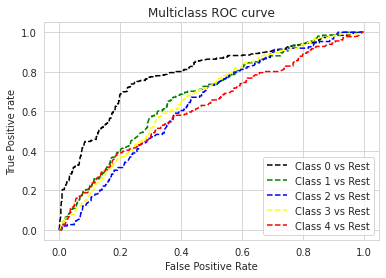

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = classifier.predict(X_test)
pred_prob = classifier.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);


**DECISION TREE USING INFORMATION GAIN**

In [ ]:
from collections import Counter
import math
import os
def entropy(labels):
    entropy=0
    label_counts = Counter(labels)
    for label in label_counts:
        prob_of_label = label_counts[label] / len(labels)
        entropy -= prob_of_label * math.log2(prob_of_label)
    return entropy

def information_gain(starting_labels, split_labels):
    info_gain = entropy(starting_labels)
    for branched_subset in split_labels:
        info_gain -= len(branched_subset) * entropy(branched_subset) / len(starting_labels)
    return info_gain

In [ ]:
def split(dataset, column):
    split_data = []
    col_vals = df[column].unique() # This tree generation method only works with discrete values
    for col_val in col_vals:
        split_data.append(dataset[dataset[column] == col_val])
    return(split_data)

In [ ]:
def find_best_split(dataset):
    best_gain = 0
    best_feature = 0
    features = list(dataset.columns)
    features.remove('class')
    for feature in features:
        split_data = split(dataset, feature)
        split_labels = [dataframe['class'] for dataframe in split_data]
        gain = information_gain(dataset['class'], split_labels)
        if gain > best_gain:
            best_gain, best_feature = gain, feature
    print(best_feature, best_gain)
    return best_feature, best_gain

new_data = split(df, find_best_split(df)[0])

instr 1.2392746215785369


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
cm

array([[278,  34,   8,  54,   8],
       [ 50,  49,   7,  88,   7],
       [ 31,  20,   2,  95,   1],
       [ 54,  31,   3, 161,   2],
       [ 48,  18,   5, 108,   2]])

In [ ]:
ac

0.422680412371134

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))
error_rate=1-ac

In [ ]:
Precision

array([0.60303688, 0.32236842, 0.08      , 0.31818182, 0.1       ])

In [ ]:
Recall

array([0.72774869, 0.24378109, 0.01342282, 0.64143426, 0.01104972])

In [ ]:
Fscore

array([0.65954923, 0.2776204 , 0.02298851, 0.42536328, 0.0199005 ])

In [ ]:
error_rate

0.5773195876288659

In [ ]:
specificity

array([0.76598465, 0.89304258, 0.9773399 , 0.62212486, 0.98168871])

In [ ]:
FPR

array([0.23401535, 0.10695742, 0.0226601 , 0.37787514, 0.01831129])

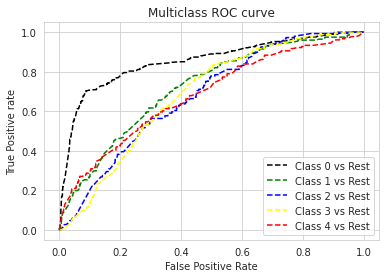

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);


**LINEAR SVM**

In [ ]:
X = df.iloc[:, [0,1,2,4,5,6,7,8,9]].values
y = df.iloc[:, 3].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
from sklearn.metrics import confusion_matrix
accuracy = svm_model_linear.score(X_test, y_test)



In [ ]:
accuracy

0.4536082474226804

In [ ]:
error_rate = 1-accuracy
error_rate

0.5463917525773196

In [ ]:
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[288,  40,   0,  54,   0],
       [ 51,  44,   1, 105,   0],
       [ 21,  12,   1, 115,   0],
       [ 37,  19,   0, 195,   0],
       [ 36,  18,   0, 127,   0]])

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


In [ ]:
Precision

array([0.66512702, 0.33082707, 0.5       , 0.32718121,        nan])

In [ ]:
Recall

array([0.7539267 , 0.21890547, 0.00671141, 0.77689243, 0.        ])

In [ ]:
Fscore

array([0.70674847, 0.26347305, 0.01324503, 0.46044864,        nan])

In [ ]:
specificity

array([0.81457801, 0.90758048, 0.99901478, 0.56078861, 1.        ])

In [ ]:
FPR

array([0.18542199, 0.09241952, 0.00098522, 0.43921139, 0.        ])

**LOGISTIC REGRESSION WITH REGULARISATION**

In [ ]:
X = df.iloc[:, [0,1,2,4,5,6,7,8,9]].values
y = df.iloc[:, 3].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
cm

array([[286,  45,   0,  52,   0],
       [ 71,  41,   3,  77,   0],
       [ 48,  28,   0,  87,   0],
       [ 56,  23,   1, 175,   0],
       [ 33,  29,   0, 108,   1]])

In [ ]:
ac

0.4321305841924399

In [ ]:
error_rate = 1-ac
error_rate

0.5678694158075601

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


In [ ]:
Precision

array([0.57894737, 0.24698795, 0.        , 0.3507014 , 1.        ])

In [ ]:
Recall

array([0.74673629, 0.21354167, 0.        , 0.68627451, 0.00584795])

In [ ]:
Fscore

array([0.65222349, 0.22905028, 0.        , 0.46419098, 0.01162791])

In [ ]:
specificity

array([0.73367478, 0.87139918, 0.996004  , 0.64356436, 1.        ])

In [ ]:
FPR

array([0.26632522, 0.12860082, 0.003996  , 0.35643564, 0.        ])

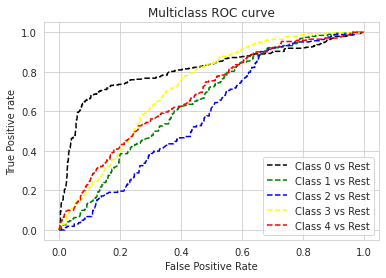

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = logisticRegr.predict(X_test)
pred_prob = logisticRegr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

**DECISION TREE USING GINI INDEX**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 100)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5)
clf_gini.fit(X_train, y_train)
y_pred_train= clf_gini.predict(X_train)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_train,y_pred_train)
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[1033,  176,    0,  192,   10],
       [  83,  313,    0,  372,    7],
       [  56,  151,    1,  389,    9],
       [  88,  163,    0,  678,   13],
       [  71,  107,    0,  414,   39]])

In [ ]:
ac

0.47285223367697593

In [ ]:
error_rate = 1-ac
error_rate

0.5271477663230241

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))
error_rate=1-ac

In [ ]:
Precision

array([0.77610819, 0.34395604, 1.        , 0.33154034, 0.5       ])

In [ ]:
Recall

array([0.73210489, 0.40387097, 0.00165017, 0.71974522, 0.06180666])

In [ ]:
Fscore

array([0.75346462, 0.37151335, 0.00329489, 0.45396719, 0.1100141 ])

In [ ]:
specificity

array([0.89911984, 0.83370474, 1.        , 0.60064271, 0.98955544])

In [ ]:
FPR

array([0.10088016, 0.16629526, 0.        , 0.39935729, 0.01044456])

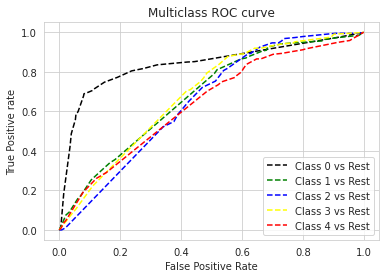

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = clf_gini.predict(X_test)
pred_prob = clf_gini.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);